In [1]:
import numpy as np
import pandas as pd

In [2]:
sites=pd.read_csv('urlset.csv')

In [3]:
sites.head()

domain   ranking  mld_res  \
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...  10000000        1   
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...  10000000        0   
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....  10000000        0   
3  mail.printakid.com/www.online.americanexpress....  10000000        0   
4  thewhiskeydregs.com/wp-content/themes/widescre...  10000000        0   

   mld.ps_res  card_rem  ratio_Rrem  ratio_Arem  jaccard_RR  jaccard_RA  \
0           0        18  107.611111  107.277778         0.0         0.0   
1           0        11  150.636364  152.272727         0.0         0.0   
2           0        14   73.500000   72.642857         0.0         0.0   
3           0         6  562.000000  590.666667         0.0         0.0   
4           0         8   29.000000   24.125000         0.0         0.0   

   jaccard_AR  jaccard_AA  jaccard_ARrd  jaccard_ARrem  label  
0         0.0         0.0           0.8       0.795729      1  
1         0.0         0.0           0.0       0.768577      1  
2         0.0         0.0           0.0       0.726582      1  
3         0.0         0.0           0.0       0.859640      1  
4         0.0         0.0           0.0       0.748971      1

In [4]:
sites=sites[['domain','label']]

In [5]:
from sklearn.utils import shuffle

In [6]:
sites=shuffle(sites)

In [7]:
sites.head()

domain  label
58873                        www-users.cs.umn.edu/~gini/      0
62793  www.toshiba.com/taec/news/press_releases/2000/...      0
11697  pay-pai.help.sec.us-login-cgi.bin.resolution.c...      1
46778  shiwaiyuan.com/assets/images/lifestyle/Golf/Ru...      1
3880                                  www.myminds.go.ro/      1

In [8]:
maxlength=max(sites['domain'].apply(len))

In [9]:
maxlength

2175

In [10]:
lengths=sites['domain'].apply(len).to_frame()

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [13]:
plt.figure(figsize=(10,10))
px.scatter(lengths,color=sites['label'])

<Figure size 720x720 with 0 Axes>

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [15]:
tokenizer = Tokenizer(num_words=400, char_level=True)
tokenizer.fit_on_texts(sites['domain'])

In [16]:
data = tokenizer.texts_to_sequences(sites['domain'])

In [17]:
word_index = tokenizer.word_index

In [18]:
print(word_index)

{'e': 1, 'a': 2, '.': 3, 'o': 4, 'c': 5, '/': 6, 't': 7, 'i': 8, 's': 9, 'm': 10, 'n': 11, 'r': 12, 'w': 13, 'd': 14, 'l': 15, 'p': 16, 'b': 17, 'h': 18, 'g': 19, 'u': 20, 'f': 21, '3': 22, '1': 23, '0': 24, '2': 25, '8': 26, '5': 27, '4': 28, '6': 29, 'y': 30, '-': 31, '7': 32, '9': 33, 'k': 34, 'x': 35, 'v': 36, '=': 37, 'j': 38, 'z': 39, '_': 40, 'q': 41, '?': 42, '&': 43, ';': 44, '\\': 45, '%': 46, "'": 47, '~': 48, ':': 49, ',': 50, '+': 51, '#': 52, ' ': 53, '@': 54, '|': 55, '(': 56, ')': 57, '!': 58, '*': 59, '^': 60, '[': 61, ']': 62, '$': 63, '{': 64, '}': 65, '`': 66, '>': 67, '\x1a': 68}


In [19]:
len(word_index)

68

In [20]:
X=sequence.pad_sequences(data, maxlen=400,padding='post')

In [21]:
print(X[0])

[13 13 13 31 20  9  1 12  9  3  5  9  3 20 10 11  3  1 14 20  6 48 19  8
 11  8  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [22]:
len(X[0])

400

In [23]:
target = np.array(sites.label)

In [24]:
print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (95911, 400) Vector dimension of target:  (95911,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.20, random_state=33)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,LSTM,Dense,Embedding,Dropout,MaxPooling1D

In [28]:
model=Sequential()
model.add(Embedding(input_dim=69,output_dim=128,input_length=400))
model.add(Dropout(0.25))
model.add(Conv1D(filters=256,kernel_size=5))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2021-08-02 13:10:13.130188: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-08-02 13:10:13.144837: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe93b32c480 executing computations on platform Host. Devices:
2021-08-02 13:10:13.144853: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [31]:
model.fit(X_train, target_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(X_test, target_test),callbacks=[early_stop])

Train on 76728 samples, validate on 19183 samples
Epoch 1/10


2021-08-02 13:10:18.337583: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference___backward_cudnn_lstm_with_fallback_2739_2921' and '__inference___backward_standard_lstm_3096_3581_specialized_for_StatefulPartitionedCall_at___inference_distributed_function_3758' both implement 'lstm_42243973-7e7e-4d98-ba3d-b95b3789baa7' but their signatures do not match.


76672/76728 [============================>.] - ETA: 0s - loss: 0.4207 - accuracy: 0.7755

2021-08-02 13:15:12.800388: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_7682' and '__inference_standard_lstm_7571_specialized_for_sequential_lstm_StatefulPartitionedCall_at___inference_distributed_function_7931' both implement 'lstm_ec3c1337-f87c-4bb0-a9af-c30646c529f0' but their signatures do not match.


76728/76728 [==============================] - 322s 4ms/sample - loss: 0.4205 - accuracy: 0.7756 - val_loss: 0.1667 - val_accuracy: 0.9410
Epoch 2/10
76728/76728 [==============================] - 340s 4ms/sample - loss: 0.1462 - accuracy: 0.9469 - val_loss: 0.1010 - val_accuracy: 0.9621
Epoch 3/10
76728/76728 [==============================] - 353s 5ms/sample - loss: 0.1039 - accuracy: 0.9641 - val_loss: 0.0946 - val_accuracy: 0.9638
Epoch 4/10
76728/76728 [==============================] - 384s 5ms/sample - loss: 0.0879 - accuracy: 0.9692 - val_loss: 0.0882 - val_accuracy: 0.9688
Epoch 5/10
76728/76728 [==============================] - 341s 4ms/sample - loss: 0.0768 - accuracy: 0.9734 - val_loss: 0.0737 - val_accuracy: 0.9734
Epoch 6/10
76728/76728 [==============================] - 335s 4ms/sample - loss: 0.0673 - accuracy: 0.9765 - val_loss: 0.0813 - val_accuracy: 0.9731
Epoch 7/10
76728/76728 [==============================] - 356s 5ms/sample - loss: 0.0620 - accuracy: 0.9781 - v

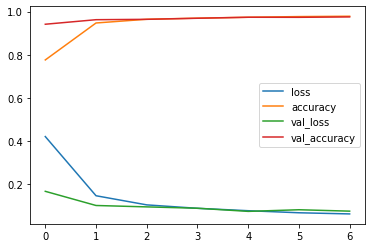

In [32]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
from tensorflow.keras.models import load_model

In [44]:
model.save('phish_detectorv1.h5')

In [45]:
predictions=model.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [37]:
print(predictions)

[[5.9008598e-04]
 [4.1814876e-01]
 [5.9899688e-04]
 ...
 [5.8372261e-04]
 [5.8282557e-04]
 [9.9987054e-01]]


In [38]:
print(predictions)

[[5.9008598e-04]
 [4.1814876e-01]
 [5.9899688e-04]
 ...
 [5.8372261e-04]
 [5.8282557e-04]
 [9.9987054e-01]]


In [39]:
pred=predictions>0.49

In [40]:
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [41]:
target_test

array([0, 0, 0, ..., 0, 0, 1])

In [42]:
print(classification_report(pred,target_test))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98      9863
        True       0.96      0.99      0.97      9320

    accuracy                           0.97     19183
   macro avg       0.97      0.98      0.97     19183
weighted avg       0.98      0.97      0.97     19183



In [43]:
print(confusion_matrix(pred,target_test))

[[9484  379]
 [ 102 9218]]


In [ ]:
frame_df=[]
for x in range(len(pred_frame):
    if pred_frame[x]>0.5:
        frame_df.append(1)
    else:
        frame_df.append(0)
        